In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
data = "../dataset/indeed_job_dataset.csv"

In [3]:
df = pd.read_csv(data, encoding="ISO-8859-1")

In [4]:
reduced_df = df.loc[:, ['Job_Type','Skill','python', 'sql', 'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark',
       'java', 'Others']]
reduced_df.tail()

,Job_Type,Skill,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others
5710,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",1,1,0,0,1,0,0,1,1,1
5711,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",0,0,0,0,0,0,0,1,1,1
5712,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",0,0,0,0,1,0,0,1,1,1
5713,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",1,0,0,0,0,0,0,0,1,1
5714,data_engineer,"['JavaScript', 'TS/SCI Clearance', 'XML', 'Had...",0,0,0,0,1,0,0,0,1,1


In [5]:
skills_grouped =  reduced_df.groupby(['Skill']).nunique()
skills_grouped.head()

,Job_Type,Skill,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others
Skill,,,,,,,,,,,,
"['.Net', 'C#', 'Machine Learning', 'Software Development', 'MATLAB', 'Image Processing', 'Signal Processing', 'Python', 'C/C++']",1,1,1,1,1,1,1,1,1,1,1,1
"['.Net', 'C#', 'Machine Learning']",1,1,1,1,1,1,1,1,1,1,1,1
"['.Net', 'Data Mining', 'C#', 'Machine Learning', 'R', 'C/C++', 'Python', 'SQL']",1,1,1,1,1,1,1,1,1,1,1,1
"['.Net', 'Java', 'C#', 'Data Warehouse', 'Scripting', 'Azure']",1,1,1,1,1,1,1,1,1,1,1,1
"['.Net', 'Java', 'C#', 'Machine Learning', 'Hadoop', 'Python', 'C/C++']",1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
skill = reduced_df['Skill'].nunique()
skill


4024

In [7]:
#Group Job Types, Sum each Skill per type, then Sort Values
job_type_grouped = reduced_df.groupby(['Job_Type']).sum().sort_values(by=['data_analyst', 'data_engineer', 'data_scientist'], axis =1, ascending =False)
job_type_grouped

,Others,sql,tableau,python,r,sas,machine learning,hadoop,java,spark
Job_Type,,,,,,,,,,
data_analyst,1462,1044,538,512,456,310,166,126,101,67
data_engineer,1338,867,214,901,228,67,289,761,704,719
data_scientist,2352,1193,484,1912,1550,564,1842,827,675,745


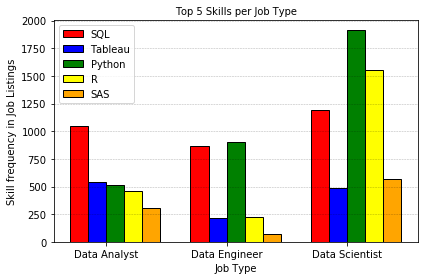

In [8]:
data = np.array([[1044, 538, 512, 456, 310], [867, 214, 901, 228, 67], 
                 [1193, 484, 1912, 1550, 564]])

length = len(data)
x_labels = ["Data Analyst", "Data Engineer", "Data Scientist"]

fig, ax = plt.subplots()
width = 0.15
x = np.arange(length)

ax.bar(x, data[:,0], width, color='red', align="center", label='SQL',  edgecolor="black")
ax.bar(x + width, data[:,1], width, color='blue', align="center", label='Tableau', edgecolor="black")
ax.bar(x + (2 * width), data[:,2], width, color='green', align="center", label='Python', edgecolor="black")
ax.bar(x + (3 * width), data[:,3], width, color='yellow', align="center",  label='R', edgecolor="black")
ax.bar(x + (4 * width), data[:,4], width, color='orange', align="center", label='SAS', edgecolor="black")

ax.set_ylabel("Skill frequency in Job Listings", fontsize= 10)
ax.set_ylim(0, max(x)+2000)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Job Type', fontsize= 10)
ax.set_title('Top 5 Skills per Job Type', fontsize= 10)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig("../Visualizations_Output_SB/BarGraph_Positions_SB.png")
fig.tight_layout()
plt.show()

In [9]:
#Create a dataframe for top skills for all job types and Sort values
per_lang_total = job_type_grouped.sum()
per_lang_total_df = pd.DataFrame([per_lang_total])
per_lang_total_df.index=['Total']
per_lang_total_df =per_lang_total_df.sort_values(by =['Total'], axis =1, ascending =False)
per_lang_total_df

,Others,python,sql,machine learning,r,hadoop,spark,java,tableau,sas
Total,5152,3325,3104,2297,2234,1714,1531,1480,1236,941


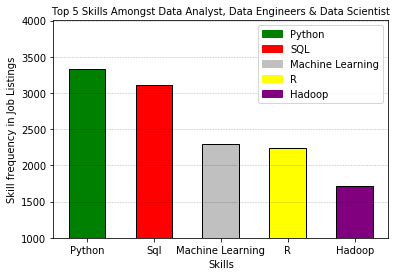

In [10]:
freq = [3325, 3104, 2297, 2234, 1714]
x_labels = ['Python','Sql','Machine Learning','R','Hadoop']

width = 0.55
x_axis = np.arange(len(freq))

python = mpatches.Patch(color='green', label='Python')
sql = mpatches.Patch(color='red', label='SQL')
ml = mpatches.Patch(color='silver', label='Machine Learning')
r = mpatches.Patch(color='yellow', label='R')
hadoop = mpatches.Patch(color='purple', label='Hadoop')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Python','Sql','Machine Learning','R','Hadoop'] )
py_bar = plt.bar(x_axis,freq,width, align="center",color =['green', 'red', 'silver', 'yellow', 'purple'], edgecolor="black")
plt.ylabel("Skill frequency in Job Listings", fontsize= 10)
plt.ylim(1000, max(x)+4000)
plt.xlabel('Skills', fontsize= 10)
plt.title('Top 5 Skills Amongst Data Analyst, Data Engineers & Data Scientist', fontsize= 10)
plt.legend(handles=[python, sql, ml, r, hadoop])
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig("../Visualizations_Output_SB/BarGraph_languages_SB.png")
fig.tight_layout()
plt.show()